In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
data = pd.read_csv('./mushrooms.csv')

In [69]:
print(data.shape)
data.head()

(8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [70]:
data[data.columns[0]].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [71]:
data.columns


Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

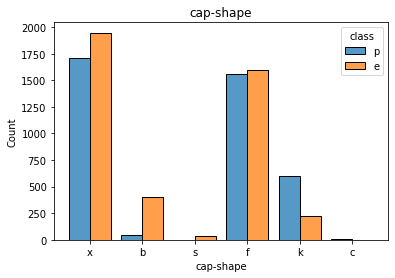

In [72]:
i=1
fig, ax = plt.subplots()
ax = sns.histplot(data, x=data.columns[i], hue='class', multiple="dodge", shrink=.8)
ax.set_title(data.columns[i])
plt.show()

In [73]:
print('duplicated: ', data.duplicated().sum())
print('nan: ', data.isna().sum())

duplicated:  0
nan:  class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [74]:
data = data.sample(frac=1).reset_index(drop=True)

y = pd.factorize(data['class'])[0]
X = data.drop(columns=['class'])


### https://towardsdatascience.com/using-the-chi-squared-test-for-feature-selection-with-implementation-b15a4dad93f1
### https://towardsdatascience.com/chi-square-test-for-feature-selection-in-machine-learning-206b1f0b8223
### https://towardsdatascience.com/anova-for-feature-selection-in-machine-learning-d9305e228476

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X.shape, X_train.shape, X_test.shape

((8124, 22), (5686, 22), (2438, 22))

In [76]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5686, 22), (5686,), (2438, 22), (2438,))

In [77]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

categorical_features = X_train.columns
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)])

pre = Pipeline(steps=[('preprocessor', preprocessor)])

colNames = pd.get_dummies(X_train).columns

X_train = pd.DataFrame.sparse.from_spmatrix(pre.fit_transform(X_train), columns=colNames)
X_test = pd.DataFrame.sparse.from_spmatrix(pre.transform(X_test), columns=colNames)

In [78]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.05)
sel.fit(X_train)

features = X_train.columns[sel.get_support()]

In [79]:
# finding constant features
sum(sel.get_support()), X_train.shape[1]

(66, 117)

In [80]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train = pd.DataFrame(X_train.toarray(), columns=features)
X_test = pd.DataFrame(X_test.toarray(), columns=features)

In [81]:
X_test

,cap-shape_b,cap-shape_f,cap-shape_k,cap-shape_x,cap-surface_f,cap-surface_s,cap-surface_y,cap-color_e,cap-color_g,cap-color_n,...,spore-print-color_k,spore-print-color_n,spore-print-color_w,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_p
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2433,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2434,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2435,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2436,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

xgbc = XGBClassifier()
dtc = DecisionTreeClassifier(random_state=111)
knc = KNeighborsClassifier()
lrc = LogisticRegression()
rfc = RandomForestClassifier(n_estimators=50, random_state=0)
abc = AdaBoostClassifier(random_state=111)
bc = BaggingClassifier(random_state=111)
etc = ExtraTreesClassifier(random_state=111)

In [83]:
dtc.fit(X_train, y_train)
knc.fit(X_train, y_train)
lrc.fit(X_train, y_train)
rfc.fit(X_train, y_train)
abc.fit(X_train, y_train)
bc.fit(X_train, y_train)
etc.fit(X_train, y_train)

ExtraTreesClassifier(random_state=111)

In [84]:
# train done using all 12 columns 
from sklearn.metrics import f1_score

models = ['dtc','knc','lrc','rfc','abc','bc','etc']

results1 = [f1_score(dtc.predict(X_test), y_test),
    f1_score(knc.predict(X_test), y_test), f1_score(lrc.predict(X_test), y_test),
    f1_score(rfc.predict(X_test), y_test), f1_score(abc.predict(X_test), y_test),
    f1_score(bc.predict(X_test), y_test), f1_score(etc.predict(X_test), y_test)]

<AxesSubplot:>

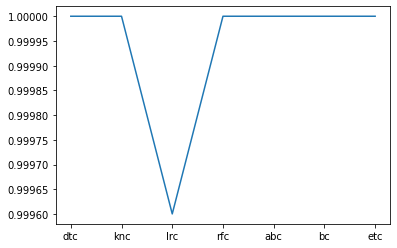

In [85]:
sns.lineplot(x=models, y=results1)

In [86]:
results1

[1.0, 1.0, 0.9996001599360256, 1.0, 1.0, 1.0, 1.0]

In [87]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(rfc)
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=50,
                                                 random_state=0))

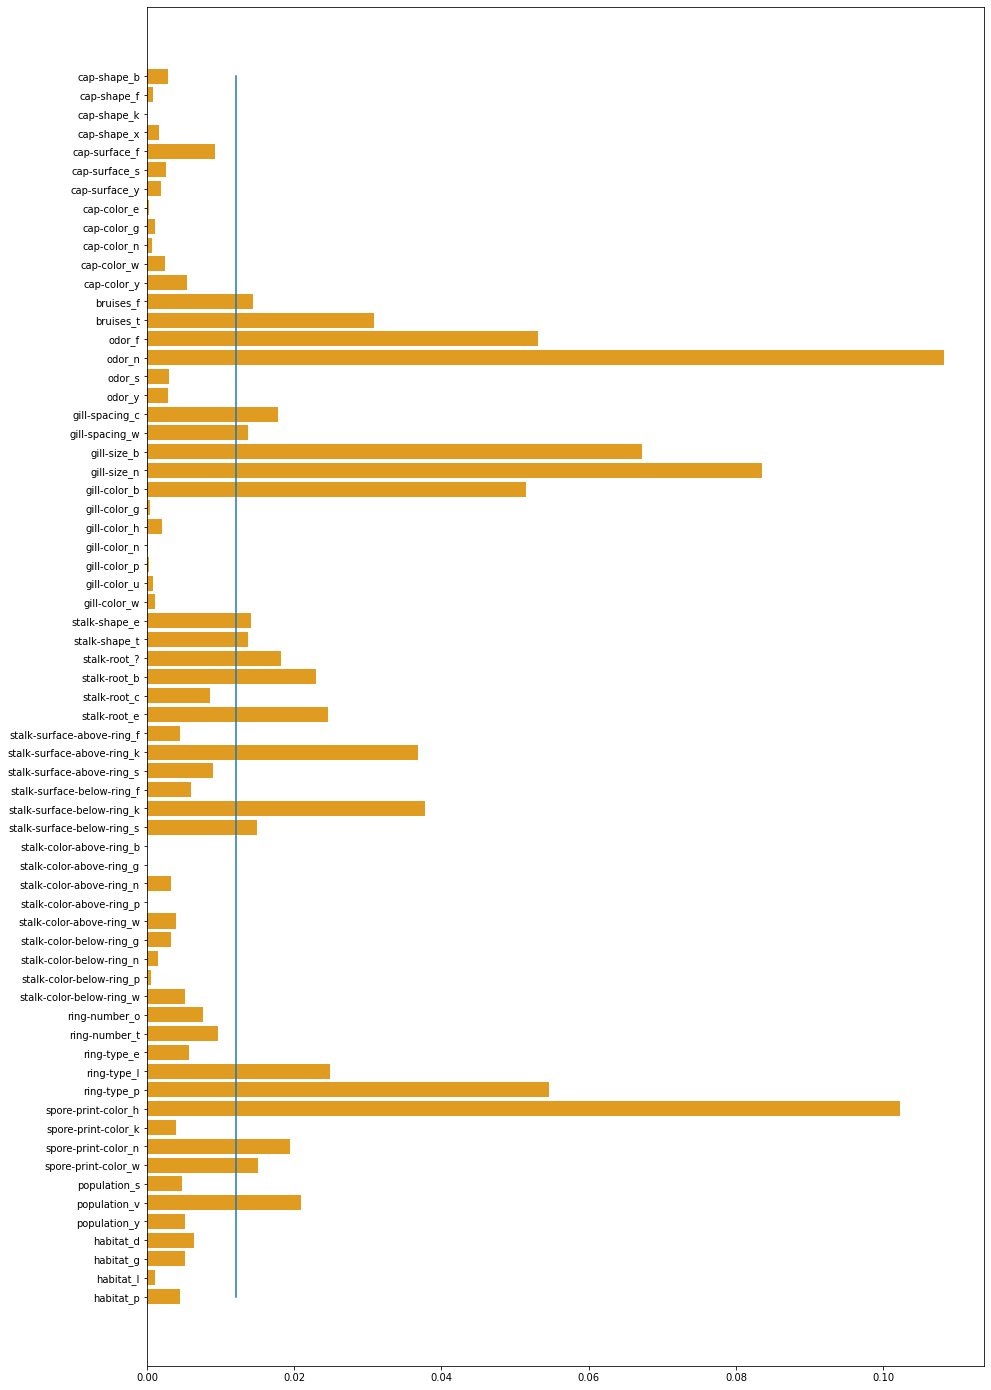

In [88]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,25))

ax=sns.barplot(y=X_train.columns, x=rfc.feature_importances_, color='orange')
ax.plot(0.8*np.mean(rfc.feature_importances_)*np.ones(len(rfc.feature_importances_)), X_train.columns)
plt.show()

In [89]:
sel = SelectFromModel(rfc, threshold='0.8*mean')
sel.fit(X_train, y_train)

print(features)
features = features[sel.get_support()]
print(features)

Index(['cap-shape_b', 'cap-shape_f', 'cap-shape_k', 'cap-shape_x',
       'cap-surface_f', 'cap-surface_s', 'cap-surface_y', 'cap-color_e',
       'cap-color_g', 'cap-color_n', 'cap-color_w', 'cap-color_y', 'bruises_f',
       'bruises_t', 'odor_f', 'odor_n', 'odor_s', 'odor_y', 'gill-spacing_c',
       'gill-spacing_w', 'gill-size_b', 'gill-size_n', 'gill-color_b',
       'gill-color_g', 'gill-color_h', 'gill-color_n', 'gill-color_p',
       'gill-color_u', 'gill-color_w', 'stalk-shape_e', 'stalk-shape_t',
       'stalk-root_?', 'stalk-root_b', 'stalk-root_c', 'stalk-root_e',
       'stalk-surface-above-ring_f', 'stalk-surface-above-ring_k',
       'stalk-surface-above-ring_s', 'stalk-surface-below-ring_f',
       'stalk-surface-below-ring_k', 'stalk-surface-below-ring_s',
       'stalk-color-above-ring_b', 'stalk-color-above-ring_g',
       'stalk-color-above-ring_n', 'stalk-color-above-ring_p',
       'stalk-color-above-ring_w', 'stalk-color-below-ring_g',
       'stalk-color-below-

In [90]:
X_train.drop(columns=[x for x in X_train.columns if x not in features.values], inplace=True)
X_test.drop(columns=[x for x in X_test.columns if x not in features.values], inplace=True)

In [91]:
X_train

,bruises_f,bruises_t,odor_f,odor_n,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,stalk-shape_e,...,stalk-root_e,stalk-surface-above-ring_k,stalk-surface-below-ring_k,stalk-surface-below-ring_s,ring-type_l,ring-type_p,spore-print-color_h,spore-print-color_n,spore-print-color_w,population_v
0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5681,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
5682,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5683,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5684,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


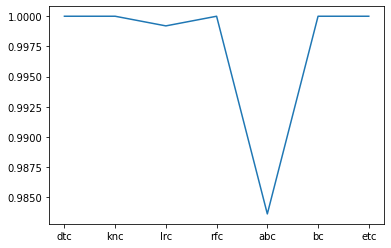

In [92]:
dtc.fit(X_train, y_train)
knc.fit(X_train, y_train)
lrc.fit(X_train, y_train)
rfc.fit(X_train, y_train)
abc.fit(X_train, y_train)
bc.fit(X_train, y_train)
etc.fit(X_train, y_train)



models = ['dtc','knc','lrc','rfc','abc','bc','etc']

results1 = [f1_score(dtc.predict(X_test), y_test),
    f1_score(knc.predict(X_test), y_test), f1_score(lrc.predict(X_test), y_test),
    f1_score(rfc.predict(X_test), y_test), f1_score(abc.predict(X_test), y_test),
    f1_score(bc.predict(X_test), y_test), f1_score(etc.predict(X_test), y_test)]


sns.lineplot(x=models, y=results1)
plt.show()

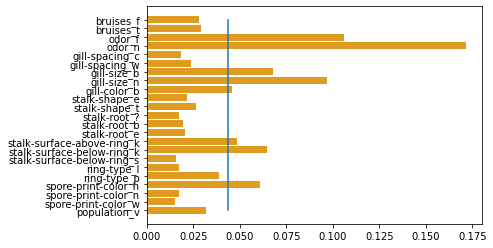

In [101]:

# sel = SelectFromModel(rfc)
# sel.fit(X_train, y_train)

fig, ax = plt.subplots()

ax=sns.barplot(y=X_train.columns, x=rfc.feature_importances_, color='orange')
ax.plot(np.mean(rfc.feature_importances_)*np.ones(len(rfc.feature_importances_)), X_train.columns)

fig.savefig('fig1.pdf')

In [94]:
data[data['stalk-shape'] == 'e']['class'].value_counts()

p    1900
e    1616
Name: class, dtype: int64

In [95]:
from sklearn.model_selection import GridSearchCV

search_space = {
      "n_estimators":[100, 150, 200],
      "criterion":['gini', 'entropy'],
      "max_features": ["auto", "sqrt", "log2"],
      "random_state":[111]
      }

In [96]:
grid = GridSearchCV(estimator=RandomForestClassifier(), 
                    param_grid=search_space,
                    cv=3,
                    scoring='f1_macro',  # Accuracy
                    return_train_score=True,
                    n_jobs=-1,  # AUC == ROC
                    verbose=10) 

In [97]:
best_model = grid.fit(X_train,y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  45 out of  54 | elapsed:    3.9s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  51 out of  54 | elapsed:    4.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    4.6s finished


In [98]:
print(best_model.best_params_)

{'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 100, 'random_state': 111}


In [99]:
rfc_best = RandomForestClassifier(random_state=111)

rfc_best.fit(X_train, y_train)

y_pred = rfc_best.predict(X_test)

print('rfc_best', f1_score(y_pred, y_test, average=None))

rfc_best [1. 1.]


In [103]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

data_r = pd.DataFrame(pca.fit_transform(X_train), columns=['PC1','PC2','PC3'])
data_r['y'] = y_train
data_r.head()

,PC1,PC2,PC3,y
0,-1.652513,-0.271902,-0.344699,1
1,1.565050,-1.350473,-0.358168,0
2,0.267013,0.142246,1.557697,1
3,1.319397,-1.557879,-0.303494,0
4,0.864240,2.194679,0.044258,0


In [105]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(data_r, x='PC1', y='PC2', z='PC3', color='y')#, size=2*np.ones(len(data_r['PC1'])))
fig.update_traces(marker=dict(size=5,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()
fig.write_image("fig1.svg")
fig.write_image("fig1.pdf")